dataset link https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset/

In [1]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image 
import seaborn as sns 
import keras.models
from keras.preprocessing import image
import pickle
import sys
sys.path.append('C:/Users/manya/Documents/Ironhack/Course/Final-project/src')
import CNN_model

### Creation of Data Image Generator

First is necessary to create the Data Image Generator that serves to provide batches for each set (training, validation and test) since sometimes is not possible to load a large set of images at once. This generator automatically loads the images, pre-processes them and returns the batches of images with their corresponding labels. Moreover, we can also used it for data augmentation.

The parameters of the function 'flow_from_directory':
- Folders paths to train, validation and test 
- Target_size is the desired size (width pixels x height pixels) images will be resized to be all the same.It is worth noting that reducing the size of the images reduces the computational resources required to train the model, but may also result in a loss of information. Thus, the choice of target size depends on the characteristics of the data set and the requirements of the model. In this model, we use the original size 224x224, because iterating through different image size it is the one that works best but takes the longest to train.
- Batch size is the number of images that are processed together in a single forward and backward pass instead of feeding the model with the entire dataset at once. Larger batch sizes will train faster and consume more memory, even though might show lower accuracy. In this model, 32 images will be processed before the model is updated. 

In [2]:
# Step 1: Preprocess the Data
train_data_dir = 'C:/Users/manya/Documents/Ironhack/Course/Final-project/images_15/train'
test_data_dir = 'C:/Users/manya/Documents/Ironhack/Course/Final-project/images_15/test'
validation_data_dir = 'C:/Users/manya/Documents/Ironhack/Course/Final-project/images_15/validation'
img_width, img_height = 224, 224
batch_size = 32


In [3]:
train_generator = CNN_model.Image_Data_Generator_train(train_data_dir,(224,224),32)

Found 15000 images belonging to 15 classes.


In [12]:
"""train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)"""


In [13]:
# Rescaling the pixel values for the test and validation datasets
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [14]:
"""# Loading and preprocessing the datasets
#train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)"""

Found 15000 images belonging to 15 classes.


In [15]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 3000 images belonging to 15 classes.


In [16]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3000 images belonging to 15 classes.


### Plot vegetables categories 

In [37]:

def plot_images(image_categories, train_path):

    """This function is used to plot a photo of each category from the image data set. It takes two arguments: 
    - image categories: a list of the categories in the path (os.makedir())
    - train_path: folder train"""
    
    # Create plot
    fig = plt.figure(figsize=(12, 12))

    #Enumerate adds a counter(label) on the list of vegetables categories
    for label, category in enumerate(image_categories): 

        # Load images for the ith category
        image_path = train_path + '/' + category 
        #List of all image files from a category
        images_in_folder = os.listdir(image_path)
        #Only plot the first one of each category
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        #Convert the image to an array
        img_arr = image.img_to_array(img)/255.0 
        
        
        # Create a subplot and add the images for each category
        plt.subplot(4, 4, label+1)
        plt.imshow(img_arr)
        plt.title(category)
        plt.axis('off')
        
    return fig

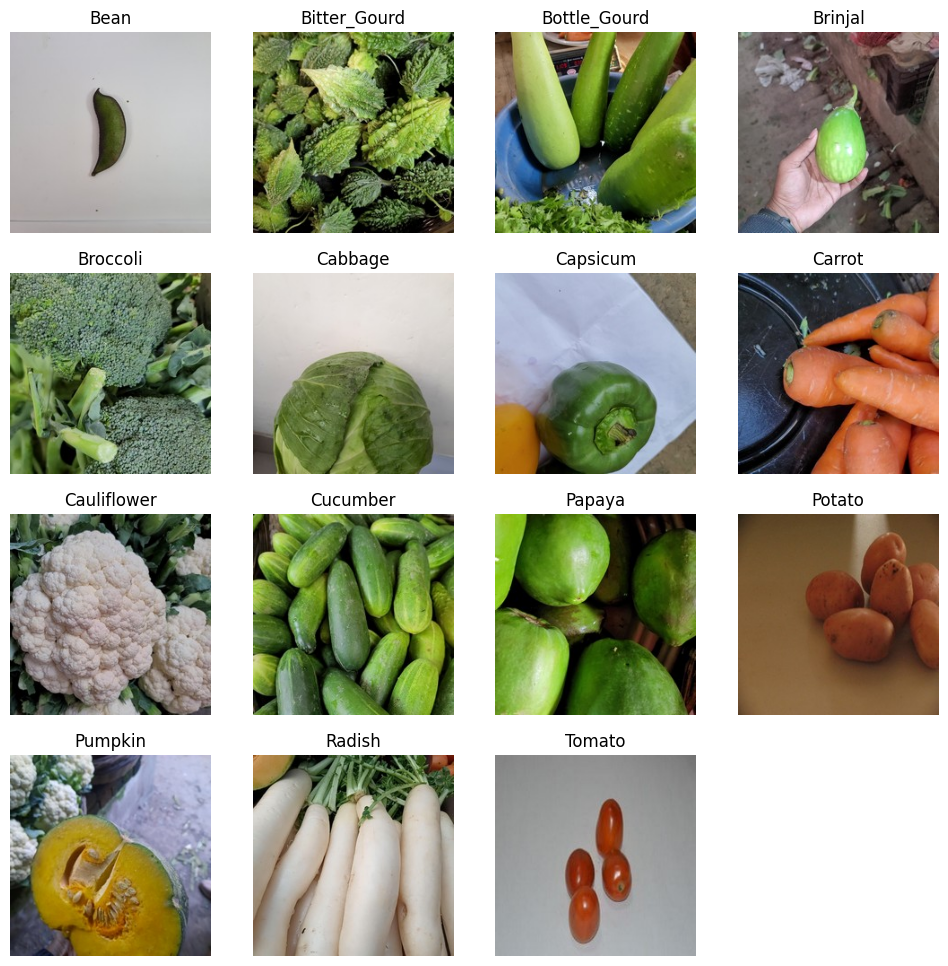

In [38]:
image_categories = os.listdir ('C:/Users/manya/Documents/Ironhack/Course/Final-project/images_15/train')
plot_images(image_categories, 'C:/Users/manya/Documents/Ironhack/Course/Final-project/images_15/train')
plt.savefig('../graphs/image_categories.png')

# Tensorflow Keras

In [13]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, SpatialDropout2D, Dropout

### Model Creation
The model will be created using Keras API. First of all, the model is sequential since the implementation is simple and adequated to the case where the neural network is a sequency of linear layers. Our model is composed of 7 layers: 

- Conv2D_2 layer: This is a convolutional layer with 32 filters and a kernel size of 3x3. It takes the input and applies convolutional operations to it, resulting in an output shape of (None, 222, 222, 32). The layer has 896 trainable parameters.

- MaxPooling2D_2 layer: This is a max pooling layer with a pool size of 2x2. It reduces the spatial dimensions of the input by half. The output shape is (None, 111, 111, 32). This layer doesn't have any trainable parameters since it performs a fixed operation.

- Conv2D_3 layer: This is another convolutional layer with 64 filters and a kernel size of 3x3. It operates on the output of the previous layer, resulting in an output shape of (None, 109, 109, 64). This layer has 18,496 trainable parameters.

- MaxPooling2D_3 layer: Similar to the previous max pooling layer, this layer reduces the spatial dimensions by half. The output shape is (None, 54, 54, 64), and it doesn't have any trainable parameters.

- Flatten_1 layer: This layer flattens the output of the previous layer into a one-dimensional vector. It transforms the input shape from (None, 54, 54, 64) to (None, 186,624). It doesn't introduce any trainable parameters.

- Dense_2 layer: This is a fully connected (dense) layer with 64 units. It takes the flattened input and applies a linear transformation to it, producing an output shape of (None, 64). This layer has 11,944,000 trainable parameters.

- Dense_3 layer: This is the final fully connected layer with 15 units, corresponding to the 15 classes the model is trying to predict. It produces the final output of the network with a shape of (None, 15). This layer has 975 trainable parameters.

Overall, this model consists of two convolutional layers followed by max pooling layers, a flattening layer, and two fully connected layers. The total number of trainable parameters in the model is 11,945,367.


In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 64)                1

In [15]:
model.compile(loss = "categorical_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

## Model Training
First, the model is compiled using three parameters: 
- Optimizer: the optimizer determines how the model is updated based on the calculated gradient during training. Adam optimizer is chosen due to the fact that adapts the learning rate for each parameter based on the average of past gradients, allowing it to converge quickly and handle sparse gradients efficiently.
- Loss: the loss function measures the discrepancy between the predicted outputs of the model and the true values. Categorical cross-entropy is used in multi-classification problems because calculates the average logarithmic loss for each class and minimizes during training
- Metrics:Accuracy is choosen for evaluating the performance of the model because it calcultaes the percentage of correctly predicted samples out of the total number of samples. A higher accuracy values indicates a better performance of the model

Then, the model is trained setting up 32 epochs, which is the total number of iterations of all the training data in one cycle for training. 

In [17]:
epochs = 32
model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/32
50/50 [==============================] - 49s 973ms/step - loss: 1.7592 - accuracy: 0.4369 - val_loss: 1.4403 - val_accuracy: 0.5500
Epoch 2/32
50/50 [==============================] - 47s 939ms/step - loss: 1.3901 - accuracy: 0.5288 - val_loss: 1.3050 - val_accuracy: 0.5983
Epoch 3/32
50/50 [==============================] - 47s 949ms/step - loss: 1.2031 - accuracy: 0.6168 - val_loss: 1.0267 - val_accuracy: 0.6593
Epoch 4/32
50/50 [==============================] - 48s 953ms/step - loss: 1.0774 - accuracy: 0.6450 - val_loss: 0.9628 - val_accuracy: 0.6847
Epoch 5/32
50/50 [==============================] - 47s 945ms/step - loss: 1.0068 - accuracy: 0.6687 - val_loss: 0.8760 - val_accuracy: 0.7177
Epoch 6/32
50/50 [==============================] - 47s 949ms/step - loss: 0.9560 - accuracy: 0.6781 - val_loss: 0.8984 - val_accuracy: 0.7020
Epoch 7/32
50/50 [==============================] - 48s 958ms/step - loss: 0.8594 - accuracy: 0.7312 - val_loss: 0.8142 - val_accuracy: 0.7367

In [18]:
model.save('../models/model_def.h5') #We save the trained model
model.save('../models/model_def.keras')

C:\Users\manya\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Model Evaluation

In [19]:
# Evaluate the model after fine-tuning
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

94/94 [==============================] - 12s 129ms/step - loss: 0.3551 - accuracy: 0.8893
Test Loss: 0.35511136054992676
Test Accuracy: 0.8893333077430725


### Model Prediction

In [8]:
model = keras.models.load_model('../models/model_def.keras')

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [17]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

94/94 [==============================] - 13s 137ms/step


In [18]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [19]:
classification_rep = classification_report(true_classes, predicted_classes, target_names=class_labels)
confusion_mat = confusion_matrix(true_classes, predicted_classes)

In [20]:
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

        Bean       0.92      0.84      0.88       200
Bitter_Gourd       0.90      0.90      0.90       200
Bottle_Gourd       0.96      0.81      0.88       200
     Brinjal       0.73      0.92      0.81       200
    Broccoli       0.69      0.98      0.81       200
     Cabbage       0.78      0.90      0.84       200
    Capsicum       0.99      0.94      0.96       200
      Carrot       1.00      0.96      0.98       200
 Cauliflower       0.94      0.73      0.83       200
    Cucumber       0.97      0.88      0.92       200
      Papaya       0.95      0.78      0.86       200
      Potato       0.98      0.99      0.99       200
     Pumpkin       0.96      0.78      0.86       200
      Radish       0.92      0.98      0.95       200
      Tomato       0.86      0.94      0.90       200

    accuracy                           0.89      3000
   macro avg       0.90      0.89      0.89      3000
wei

In [21]:
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[168   9   0   3  11   3   1   0   0   0   0   1   0   1   3]
 [  1 180   0   0   5   4   0   0   2   0   0   0   0   2   6]
 [  1   2 161  16   0  11   0   0   0   3   4   0   1   0   1]
 [  5   1   2 184   1   7   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0 197   1   0   0   0   0   0   0   0   0   1]
 [  0   5   0   0  12 180   0   0   1   0   0   0   2   0   0]
 [  1   0   0   3   1   1 188   0   0   1   1   0   1   0   3]
 [  0   0   0   0   0   0   0 193   0   0   0   2   0   2   3]
 [  1   0   0   1  21   9   0   0 147   0   0   0   3   9   9]
 [  4   1   0   9   2   3   0   0   1 175   3   0   0   0   2]
 [  0   0   4  35   0   1   1   0   0   1 156   0   0   0   2]
 [  0   0   0   0   0   0   0   0   0   0   0 198   0   2   0]
 [  0   0   0   0  33   8   0   0   1   0   0   1 156   0   1]
 [  0   2   0   0   0   0   0   0   2   0   0   0   0 196   0]
 [  0   0   0   1   4   2   0   0   2   0   0   0   0   2 189]]


In [30]:
def conf_matrix (confusion_mat): 

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap (confusion_mat,
                 annot=True,
                annot_kws={"fontsize": 10},
                fmt=".0f",
                linewidth=0.5,
                square=True,
                cmap="YlGnBu")
    plt.xticks(np.arange(len(class_labels)), class_labels, rotation=90)
    ax.set_yticks(np.arange(len(class_labels)))
    ax.set_yticklabels(class_labels, rotation=0)                 
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.title("Confusion Matrix")

    plt.show()

    return fig,ax

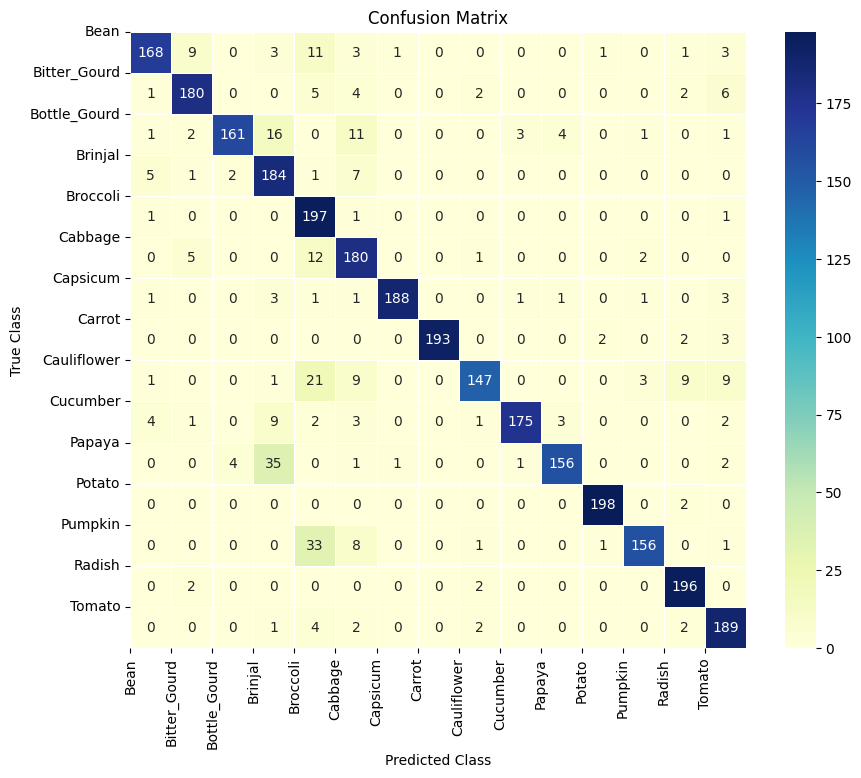

<Figure size 640x480 with 0 Axes>

In [32]:
conf_matrix(confusion_mat)
plt.savefig('../graphs/model_def_confusion_matrix.png')

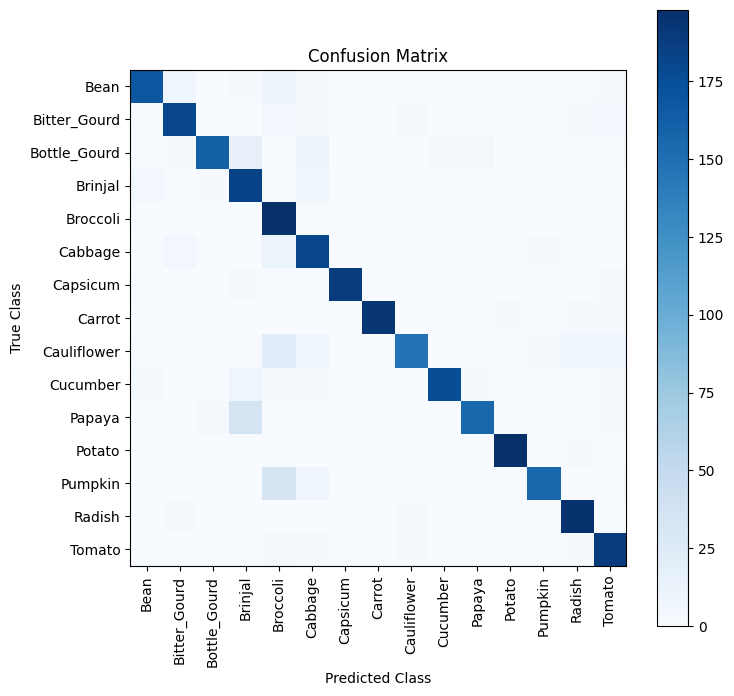

In [26]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(confusion_mat, cmap=plt.cm.Blues)
plt.xticks(np.arange(len(class_labels)), class_labels, rotation=90)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

In [27]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


In [34]:
def resize_images(file_path): 

    """This function is used to resize the files to 224x224 pixels in order to be uniform
    among them. This function takes as argument the original folder where the files are
    located. """

    try: 
        #Open the image file 
        image = Image.open(file_path)
        #Resize the image file to 224x224 pixels using antialias
        image = image.resize((224, 224), Image.ANTIALIAS)
        #Save the resized image
        image.save(file_path)
        #print(f"Rescaled {filename} successfully.")
    except Exception as e:
        #If an error occurs during the resizing, print a message 
        print(f"Error rescaling {file_path}: {e}")


In [37]:
resize_images("C:/Users/manya/Documents/Ironhack/Course/Final-project/images_15/captured/1.jpeg")

C:\Users\manya\AppData\Local\Temp\ipykernel_14956\3144586713.py:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((224, 224), Image.ANTIALIAS)


1/1 [==============================] - 0s 65ms/step


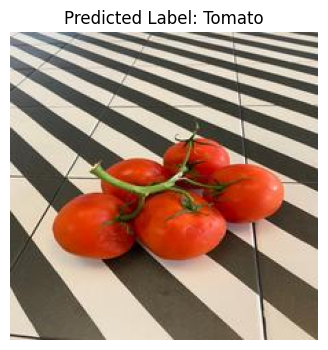

In [38]:
from keras.preprocessing import image
import keras.utils as image

# Testing the Model
test_image_path = "../images_15/captured/1.jpeg"

def generate_predictions(test_image_path):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(224, 224))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}".format(predicted_vegetable))
    plt.grid()
    plt.axis('off')
    plt.show()


# call the function
generate_predictions(test_image_path)

In [42]:
def predict_label (test_image_path):
     # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(224, 224))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    class_map = dict([(v, k) for k, v in train_generator.class_indices.items()])
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]

    return predicted_vegetable

In [43]:
predict_label("../images_15/captured/16_camera_pc.jpg")

1/1 [==============================] - 0s 26ms/step


'Tomato'

In [42]:
def convert_png_to_jpg(file_path):

    if file_path.endswith('.png'):

            # Open the PNG file and convert it to JPG 
        image = Image.open(file_path)
        image = image.convert('RGB')


            # Save the image in JPG
        image.save(file_path, 'JPEG')

            # Drop the original file in PNG
            

    print('Complete conversion and PNG files eliminated.')

In [71]:
resize_images("../images_15/captured/16_camera_pc.jpg")

C:\Users\manya\AppData\Local\Temp\ipykernel_14956\3144586713.py:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((224, 224), Image.ANTIALIAS)


1/1 [==============================] - 0s 34ms/step


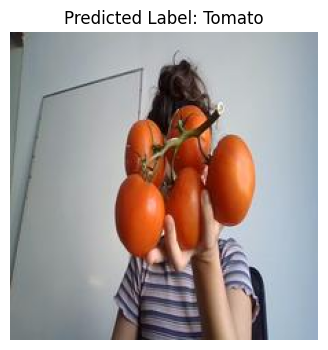

In [72]:
generate_predictions("../images_15/captured/16_camera_pc.jpg")